Modelo LSTM para prever o parâmetro pH 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
import math
import matplotlib.pyplot as plt
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18
plt.rcParams.update({'font.size':18})

In [2]:
str_files = ''

#df = pd.read_csv(str_files + "ph.csv",encoding='utf-8',sep=';')
dateparse = lambda dates:pd.datetime.strptime(dates,'%d/%m/%Y')
df = pd.read_csv(str_files + 'ph.csv',encoding='utf-8',sep=';', parse_dates = ['data_coleta'],index_col=['data_coleta'],date_parser=dateparse)

In [3]:
#df.head()

In [4]:
z = df.loc[df['UGRHI'] == '10 - SOROCABA/MEDIO TIETE']
#z.info()

In [5]:
z = z.dropna(axis=1,how='any')
#for field in z.columns:
    #print(field,'NaN',z[field].isnull().sum())
#print(len(z))

In [6]:
trainingd = z.resample('3M').mean()
trainingd = trainingd.iloc[:,1:2].values
print(len(trainingd))

166


In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(trainingd)
#training_set_scaled

In [8]:
x_train = []
y_train = []
timestamp = 33
length = len(trainingd)
for i in range(timestamp, length):
    x_train.append(training_set_scaled[i-timestamp:i, 0])
    y_train.append(training_set_scaled[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [9]:
print (x_train[0])
print ('\n')
print (y_train[0])

[0.53333333 0.06666667 0.20808081 0.12323232 0.29292929 0.49090909
 0.34949495 0.05252525 0.06666667 0.19393939 0.08080808 0.32121212
 0.36363636 0.22222222 0.29292929 0.10909091 0.         0.05252525
 0.04309764 0.26936027 0.25757576 0.19393939 0.19393939 0.26464646
 0.43636364 0.32828283 0.28727273 0.54040404 0.56868687 0.0030303
 0.33181818 0.37777778 0.53333333]


0.16565656565656628


In [10]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(133, 33, 1)

In [11]:
test_set = df.loc[df['UGRHI'] == '06 - ALTO TIÊTE']
test_set = test_set.dropna(axis=1,how='any')
#for field in test_set.columns:
    #print(field,'NaN',test_set[field].isnull().sum())
    
test_set = test_set.resample('3M').mean()
y_test = test_set.iloc[timestamp:,1:2].values


valor = test_set.iloc[:,1:2].values
valor_scaled = sc.transform(valor)

x_test = []
length = len(test_set)

for i in range(timestamp, length):
    x_test.append(valor_scaled[i-timestamp:i,0])
    
x_test = np.array(x_test)
x_test.shape

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(135, 33, 1)

In [12]:
test_x = []
test_y = []

length = len(test_set)
for i in range(timestamp, length):
    test_x.append(valor_scaled[i-timestamp:i, 0])
    test_y.append(valor_scaled[i, 0])

test_x = np.array(test_x)
test_y = np.array(test_y)

test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))
test_x.shape

(135, 33, 1)

Rede Neural LSTM com 10 neuronios nas camadas de entrada e oculta - epocas:100
Train on 133 samples, validate on 135 samples
Epoch 1/100
133/133 [==============================] - 20s 151ms/sample - loss: 0.1555 - val_loss: 0.0253
Epoch 2/100
133/133 [==============================] - 2s 13ms/sample - loss: 0.0537 - val_loss: 0.0290
Epoch 3/100
133/133 [==============================] - 1s 11ms/sample - loss: 0.0473 - val_loss: 0.0287
Epoch 4/100
133/133 [==============================] - 1s 11ms/sample - loss: 0.0459 - val_loss: 0.0204
Epoch 5/100
133/133 [==============================] - 2s 14ms/sample - loss: 0.0457 - val_loss: 0.0199
Epoch 6/100
133/133 [==============================] - 2s 15ms/sample - loss: 0.0451 - val_loss: 0.0243
Epoch 7/100
133/133 [==============================] - 1s 11ms/sample - loss: 0.0450 - val_loss: 0.0207
Epoch 8/100
133/133 [==============================] - 1s 11ms/sample - loss: 0.0451 - val_loss: 0.0190
Epoch 9/100
133/133 [====================

Epoch 78/100
133/133 [==============================] - 2s 15ms/sample - loss: 0.0244 - val_loss: 0.0169
Epoch 79/100
133/133 [==============================] - 2s 12ms/sample - loss: 0.0273 - val_loss: 0.0170
Epoch 80/100
133/133 [==============================] - 1s 11ms/sample - loss: 0.0257 - val_loss: 0.0172
Epoch 81/100
133/133 [==============================] - 1s 10ms/sample - loss: 0.0293 - val_loss: 0.0170
Epoch 82/100
133/133 [==============================] - 1s 10ms/sample - loss: 0.0308 - val_loss: 0.0172
Epoch 83/100
133/133 [==============================] - 1s 10ms/sample - loss: 0.0242 - val_loss: 0.0173
Epoch 84/100
133/133 [==============================] - 1s 9ms/sample - loss: 0.0279 - val_loss: 0.0167
Epoch 85/100
133/133 [==============================] - 1s 10ms/sample - loss: 0.0278 - val_loss: 0.0173
Epoch 86/100
133/133 [==============================] - 1s 10ms/sample - loss: 0.0268 - val_loss: 0.0167
Epoch 87/100
133/133 [==============================] - 

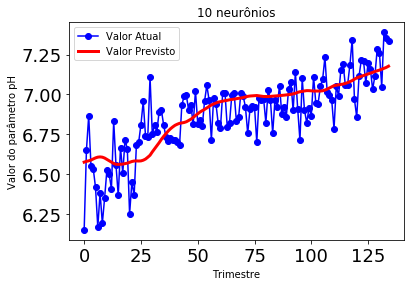

In [15]:
#neuronios = [16,60,120]
resultado_mse = []
qtde_neuronios =[]

print("Rede Neural LSTM com 10 neuronios nas camadas de entrada e oculta - epocas:100")
model = Sequential() 

model.add(LSTM(units = 10, return_sequences = True, input_shape = (x_train.shape[1], 1))) 
model.add(Dropout(0.2))
model.add(LSTM(units = 10, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 10, return_sequences = False)) 
model.add(Dropout(0.2))
model.add(Dense(units = 1)) 
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#es = EarlyStopping(monitor='val_loss',mode='auto',verbose = 1,patience=5)

h10 = model.fit(x_train, y_train, epochs = 100, batch_size = 32, validation_data=(test_x,test_y))

y_pred = model.predict(x_test)
predicted_valor = sc.inverse_transform(y_pred)

plt.plot(y_test, color='blue', label='Valor Atual',marker='o')
plt.plot(predicted_valor, color='red', linewidth = 3,label='Valor Previsto')
plt.title('10 neurônios')
plt.xlabel('Trimestre')
plt.ylabel('Valor do parâmetro pH')
plt.legend()
plt.show()

mse = np.square(np.subtract(y_test,predicted_valor)).mean()
#print("MSE:", round(mse,2))
    
resultado_mse.append(mse)
qtde_neuronios.append(10)
    


In [16]:
train_score10 = model.evaluate(x_train, y_train, verbose=0)
print(train_score10)
print('Pontuação de Treino: {:.2f} MSE ({:.2f} RMSE)'.format(train_score10, math.sqrt(train_score10)))
test_score10 = model.evaluate(test_x, test_y, verbose=0)
print('Pontuação de teste: {:.2f} MSE ({:.2f} RMSE)'.format(test_score10, math.sqrt(test_score10)))

0.021430094439284245
Pontuação de Treino: 0.02 MSE (0.15 RMSE)
Pontuação de teste: 0.02 MSE (0.13 RMSE)


<function matplotlib.pyplot.show(*args, **kw)>

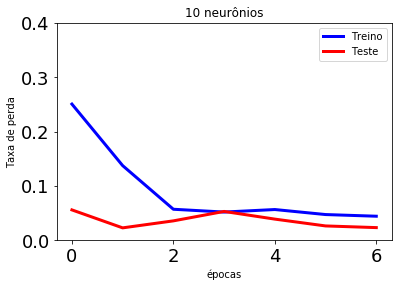

In [17]:
plt.ylim(0,0.4)
plt.plot(h10.history['loss'],'blue',linewidth = 3,label='Treino')
plt.plot(h10.history['val_loss'],'red',linewidth = 3,label='Teste')
plt.title('10 neurônios')
plt.ylabel('Taxa de perda')
plt.xlabel('épocas')
plt.legend()
plt.show

Rede Neural LSTM com 25 neuronios nas camadas de entrada e oculta - epocas:100
Train on 133 samples, validate on 135 samples
Epoch 1/100
133/133 [==============================] - 20s 149ms/sample - loss: 0.2896 - val_loss: 0.0628
Epoch 2/100
133/133 [==============================] - 1s 7ms/sample - loss: 0.1016 - val_loss: 0.0236
Epoch 3/100
133/133 [==============================] - 1s 7ms/sample - loss: 0.0517 - val_loss: 0.0621
Epoch 4/100
133/133 [==============================] - 1s 8ms/sample - loss: 0.0513 - val_loss: 0.0252
Epoch 5/100
133/133 [==============================] - 1s 7ms/sample - loss: 0.0355 - val_loss: 0.0211
Epoch 6/100
133/133 [==============================] - 1s 7ms/sample - loss: 0.0366 - val_loss: 0.0220
Epoch 7/100
133/133 [==============================] - 1s 7ms/sample - loss: 0.0327 - val_loss: 0.0292
Epoch 8/100
133/133 [==============================] - 1s 8ms/sample - loss: 0.0392 - val_loss: 0.0326
Epoch 9/100
133/133 [===========================

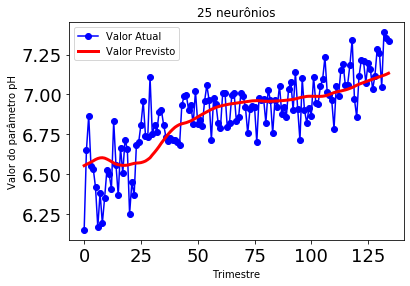

In [21]:
print("Rede Neural LSTM com 25 neuronios nas camadas de entrada e oculta - epocas:100")
model = Sequential() 

model.add(LSTM(units = 25, return_sequences = True, input_shape = (x_train.shape[1], 1))) 
model.add(Dropout(0.2))
model.add(LSTM(units = 25, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 25, return_sequences = False)) 
model.add(Dropout(0.2))
model.add(Dense(units = 1)) 
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#es = EarlyStopping(monitor='val_loss',mode='min',verbose = 1)

h25 = model.fit(x_train, y_train, epochs = 100, batch_size = 32, validation_data=(test_x,test_y))

y_pred = model.predict(x_test)
predicted_valor = sc.inverse_transform(y_pred)

plt.plot(y_test, color='blue', label='Valor Atual',marker='o')
plt.plot(predicted_valor, color='red',linewidth = 3, label='Valor Previsto')
plt.title('25 neurônios')
plt.xlabel('Trimestre')
plt.ylabel('Valor do parâmetro pH')
plt.legend()
plt.show()

mse = np.square(np.subtract(y_test,predicted_valor)).mean()
#print("MSE:", round(mse,2))
    
resultado_mse.append(mse)
qtde_neuronios.append(25)


In [22]:
train_score25 = model.evaluate(x_train, y_train, verbose=0)
print(train_score25)
print('Pontuação de Treino: {:.2f} MSE ({:.2f} RMSE)'.format(train_score25, math.sqrt(train_score25)))
test_score25 = model.evaluate(test_x, test_y, verbose=0)
print('Pontuação de teste: {:.2f} MSE ({:.2f} RMSE)'.format(test_score25, math.sqrt(test_score25)))

0.023079360618179005
Pontuação de Treino: 0.02 MSE (0.15 RMSE)
Pontuação de teste: 0.02 MSE (0.13 RMSE)


<function matplotlib.pyplot.show(*args, **kw)>

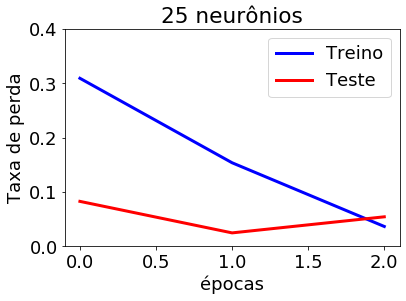

In [111]:
plt.ylim(0,0.4)
plt.plot(h25.history['loss'],'blue',linewidth = 3,label='Treino')
plt.plot(h25.history['val_loss'],'red',linewidth = 3,label='Teste')
plt.title('25 neurônios')
plt.ylabel('Taxa de perda')
plt.xlabel('épocas')
plt.legend()
plt.show

Rede Neural LSTM com 50 neuronios nas camadas de entrada e oculta - epocas:100
Train on 133 samples, validate on 135 samples
Epoch 1/100
133/133 [==============================] - 18s 139ms/sample - loss: 0.2044 - val_loss: 0.0190
Epoch 2/100
133/133 [==============================] - 2s 14ms/sample - loss: 0.0427 - val_loss: 0.0263
Epoch 3/100
133/133 [==============================] - 1s 7ms/sample - loss: 0.0354 - val_loss: 0.0223
Epoch 4/100
133/133 [==============================] - 1s 8ms/sample - loss: 0.0441 - val_loss: 0.0206
Epoch 5/100
133/133 [==============================] - 1s 8ms/sample - loss: 0.0266 - val_loss: 0.0399
Epoch 6/100
133/133 [==============================] - 1s 7ms/sample - loss: 0.0395 - val_loss: 0.0280
Epoch 7/100
133/133 [==============================] - 1s 7ms/sample - loss: 0.0254 - val_loss: 0.0208
Epoch 8/100
133/133 [==============================] - 1s 8ms/sample - loss: 0.0379 - val_loss: 0.0208
Epoch 9/100
133/133 [==========================

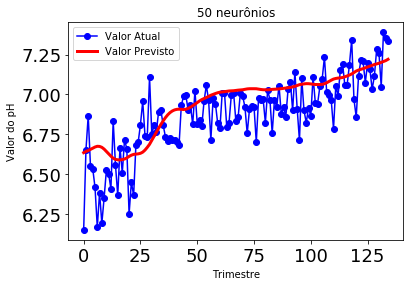

NameError: name 'resultado_mse' is not defined

In [13]:
print("Rede Neural LSTM com 50 neuronios nas camadas de entrada e oculta - epocas:100")
model = Sequential() 

model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1))) 
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = False)) 
model.add(Dropout(0.2))
model.add(Dense(units = 1)) 
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#es = EarlyStopping(monitor='val_loss',mode='auto',verbose = 1)

h50 = model.fit(x_train, y_train, epochs = 100, batch_size = 32, validation_data=(test_x,test_y))

y_pred = model.predict(x_test)
predicted_valor = sc.inverse_transform(y_pred)

plt.plot(y_test, color='blue', label='Valor Atual',marker='o')
plt.plot(predicted_valor, color='red',linewidth = 3,label='Valor Previsto')
plt.title('50 neurônios')
plt.xlabel('Trimestre')
plt.ylabel('Valor do pH')
plt.legend()
plt.show()

mse = np.square(np.subtract(y_test,predicted_valor)).mean()
#print("MSE:", round(mse,2))
    
resultado_mse.append(mse)
qtde_neuronios.append(50)


In [14]:
train_score50 = model.evaluate(x_train, y_train, verbose=0)
print(train_score50)
print('Pontuação de Treino: {:.2f} MSE ({:.2f} RMSE)'.format(train_score50, math.sqrt(train_score50)))
test_score50 = model.evaluate(test_x, test_y, verbose=0)
print('Pontuação de teste: {:.2f} MSE ({:.2f} RMSE)'.format(test_score50, math.sqrt(test_score50)))

0.022469188737914078
Pontuação de Treino: 0.02 MSE (0.15 RMSE)
Pontuação de teste: 0.02 MSE (0.14 RMSE)


<function matplotlib.pyplot.show(*args, **kw)>

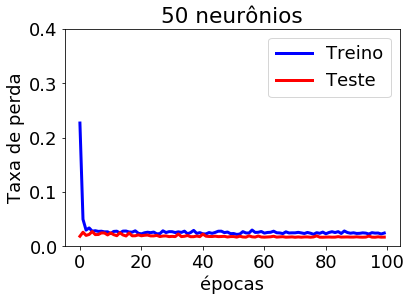

In [32]:
plt.ylim(0,0.4)
plt.plot(h50.history['loss'],'blue',linewidth = 3,label='Treino')
plt.plot(h50.history['val_loss'],'red',linewidth = 3,label='Teste')
plt.title('50 neurônios')
plt.ylabel('Taxa de perda')
plt.xlabel('épocas')
plt.legend()
plt.show

In [ ]:
str_files = ''

#df = pd.read_csv(str_files + "ph.csv",encoding='utf-8',sep=';')
dateparse = lambda dates:pd.datetime.strptime(dates,'%d/%m/%Y')
df = pd.read_csv(str_files + 'ph.csv',encoding='utf-8',sep=';', parse_dates = ['data_coleta'],index_col=['data_coleta'],date_parser=dateparse)

In [14]:
test_set = df.loc[df['UGRHI'] == '07 - BAIXADA SANTISTA']
test_set = test_set.dropna(axis=1,how='any')
#for field in test_set.columns:
    #print(field,'NaN',test_set[field].isnull().sum())
    
test_set = test_set.resample('3M').mean()
y_test = test_set.iloc[timestamp:,1:2].values


valor = test_set.iloc[:,1:2].values
valor_scaled = sc.transform(valor)

x_test = []
length = len(test_set)

for i in range(timestamp, length):
    x_test.append(valor_scaled[i-timestamp:i,0])
    
x_test = np.array(x_test)
x_test.shape

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(22, 33, 1)

In [41]:
test_x = []
test_y = []

length = len(test_set)
for i in range(timestamp, length):
    test_x.append(valor_scaled[i-timestamp:i, 0])
    test_y.append(valor_scaled[i, 0])

test_x = np.array(test_x)
test_y = np.array(test_y)

test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))
test_x.shape

(44, 33, 1)

Rede Neural LSTM com 10 neuronios nas camadas de entrada e oculta - epocas:100
Train on 133 samples, validate on 44 samples
Epoch 1/100
133/133 [==============================] - 19s 145ms/sample - loss: 0.3856 - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/100
133/133 [==============================] - 1s 10ms/sample - loss: 0.3199 - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/100
133/133 [==============================] - 1s 7ms/sample - loss: 0.2632 - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/100
133/133 [==============================] - 1s 7ms/sample - loss: 0.2125 - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/100
133/133 [==============================] - 1s 7ms/sample - loss: 0.1396 - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/100
133/133 [==============================] - 1s 7ms/sample - loss: 0.0750 - accuracy: 0.0075 - val_loss: nan - v

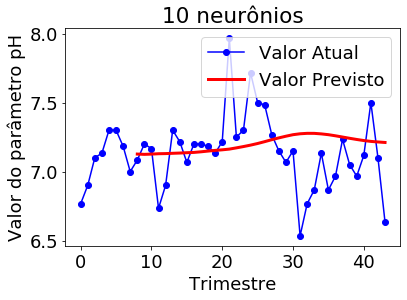

In [ ]:
resultado_mse2 = []

print("Rede Neural LSTM com 10 neuronios nas camadas de entrada e oculta - epocas:100")
model = Sequential() 

model.add(LSTM(units = 10, return_sequences = True, input_shape = (x_train.shape[1], 1))) 
model.add(Dropout(0.2))
model.add(LSTM(units = 10, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 10, return_sequences = False)) 
model.add(Dropout(0.2))
model.add(Dense(units = 1)) 
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

h10 = model.fit(x_train, y_train, epochs = 100, batch_size = 32, validation_data=(test_x,test_y))

y_pred = model.predict(x_test)
predicted_valor = sc.inverse_transform(y_pred)

plt.plot(y_test, color='blue', label='Valor Atual',marker='o')
plt.plot(predicted_valor, color='red', linewidth = 3,label='Valor Previsto')
plt.title('10 neurônios')
plt.xlabel('Trimestre')
plt.ylabel('Valor do parâmetro pH')
plt.legend()
plt.show()

mse = np.square(np.subtract(y_test,predicted_valor)).mean()
#print("MSE:", round(mse,2))
    
resultado_mse2.append(mse)
#qtde_neuronios.append(10)
    


In [33]:
real_m = []
previsto_m = []
mse_m = []

for i in range(len(y_test)):
    real_m.append(round(y_test[i][0],2))
    #print("Real:",round(y_test[i][0],2))

for i in range(len(predicted_valor)):
    previsto_m.append(round(predicted_valor[i][0],2))
    #print("Previsto",round(predicted_valor[i][0],2))
    
for i in range(len(predicted_valor)):
    mse = np.square(np.subtract(y_test[i][0],predicted_valor[i][0])).mean()
    mse_m.append(mse)

Rede Neural LSTM com 40 neuronios nas camadas de entrada e oculta - epocas:100
Train on 133 samples
Epoch 1/50
133/133 [==============================] - 20s 151ms/sample - loss: 0.2149 - accuracy: 0.0000e+00
Epoch 2/50
133/133 [==============================] - 1s 8ms/sample - loss: 0.0565 - accuracy: 0.0075
Epoch 3/50
133/133 [==============================] - 1s 8ms/sample - loss: 0.0306 - accuracy: 0.0075
Epoch 4/50
133/133 [==============================] - 1s 8ms/sample - loss: 0.0366 - accuracy: 0.0000e+00
Epoch 5/50
133/133 [==============================] - 1s 8ms/sample - loss: 0.0267 - accuracy: 0.0075
Epoch 6/50
133/133 [==============================] - 1s 9ms/sample - loss: 0.0293 - accuracy: 0.0075
Epoch 7/50
133/133 [==============================] - 1s 9ms/sample - loss: 0.0307 - accuracy: 0.0075
Epoch 8/50
133/133 [==============================] - 1s 8ms/sample - loss: 0.0286 - accuracy: 0.0075
Epoch 9/50
133/133 [==============================] - 1s 9ms/sample - los

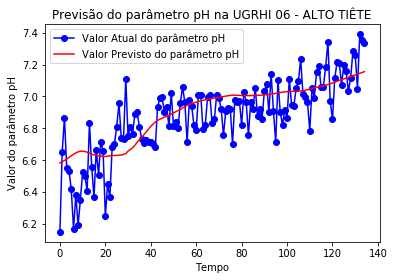

In [14]:
print("Rede Neural LSTM com 40 neuronios nas camadas de entrada e oculta - epocas:100")
model = Sequential() 

model.add(LSTM(units = 40, return_sequences = True, input_shape = (x_train.shape[1], 1))) 
model.add(Dropout(0.2))
model.add(LSTM(units = 40, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 40, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 40, return_sequences = False)) 
model.add(Dropout(0.2))
model.add(Dense(units = 1)) 
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 50, batch_size = 32)

y_pred = model.predict(x_test)
predicted_valor = sc.inverse_transform(y_pred)

plt.plot(y_test, color='blue', label='Valor Atual do parâmetro pH',marker='o')
plt.plot(predicted_valor, color='red', label='Valor Previsto do parâmetro pH')
plt.title('Previsão do parâmetro pH na UGRHI 06 - ALTO TIÊTE')
plt.xlabel('Tempo')
plt.ylabel('Valor do parâmetro pH')
plt.legend()
plt.show()

mse = np.square(np.subtract(y_test,predicted_valor)).mean()
#print("MSE:", round(mse,2))
    
resultado_mse.append(mse)
qtde_neuronios.append(40)

Rede Neural LSTM com 60 neuronios nas camadas de entrada e oculta - epocas:100
Train on 133 samples
Epoch 1/50
133/133 [==============================] - 21s 155ms/sample - loss: 0.2194 - accuracy: 0.0000e+00
Epoch 2/50
133/133 [==============================] - 1s 10ms/sample - loss: 0.0649 - accuracy: 0.0075
Epoch 3/50
133/133 [==============================] - 1s 9ms/sample - loss: 0.0493 - accuracy: 0.0075
Epoch 4/50
133/133 [==============================] - 1s 10ms/sample - loss: 0.0304 - accuracy: 0.0075
Epoch 5/50
133/133 [==============================] - 1s 9ms/sample - loss: 0.0344 - accuracy: 0.0075
Epoch 6/50
133/133 [==============================] - 1s 10ms/sample - loss: 0.0327 - accuracy: 0.0075
Epoch 7/50
133/133 [==============================] - 1s 9ms/sample - loss: 0.0326 - accuracy: 0.0075
Epoch 8/50
133/133 [==============================] - 1s 10ms/sample - loss: 0.0298 - accuracy: 0.0075
Epoch 9/50
133/133 [==============================] - 1s 10ms/sample - lo

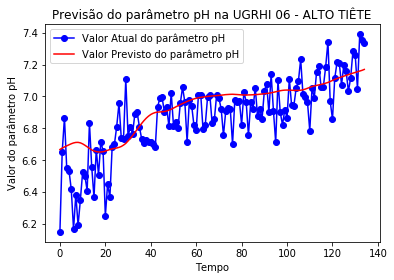

In [15]:
print("Rede Neural LSTM com 60 neuronios nas camadas de entrada e oculta - epocas:100")
model = Sequential() 

model.add(LSTM(units = 60, return_sequences = True, input_shape = (x_train.shape[1], 1))) 
model.add(Dropout(0.2))
model.add(LSTM(units = 60, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, return_sequences = False)) 
model.add(Dropout(0.2))
model.add(Dense(units = 1)) 
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 50, batch_size = 32)

y_pred = model.predict(x_test)
predicted_valor = sc.inverse_transform(y_pred)

plt.plot(y_test, color='blue', label='Valor Atual do parâmetro pH',marker='o')
plt.plot(predicted_valor, color='red', label='Valor Previsto do parâmetro pH')
plt.title('Previsão do parâmetro pH na UGRHI 06 - ALTO TIÊTE')
plt.xlabel('Tempo')
plt.ylabel('Valor do parâmetro pH')
plt.legend()
plt.show()

mse = np.square(np.subtract(y_test,predicted_valor)).mean()
#print("MSE:", round(mse,2))
    
resultado_mse.append(mse)
qtde_neuronios.append(60)

Rede Neural LSTM com 81 neuronios nas camadas de entrada e oculta - epocas:100
Train on 133 samples
Epoch 1/50
133/133 [==============================] - 21s 155ms/sample - loss: 0.1978 - accuracy: 0.0075
Epoch 2/50
133/133 [==============================] - 1s 10ms/sample - loss: 0.0559 - accuracy: 0.0075
Epoch 3/50
133/133 [==============================] - 1s 10ms/sample - loss: 0.0434 - accuracy: 0.0075
Epoch 4/50
133/133 [==============================] - 1s 10ms/sample - loss: 0.0355 - accuracy: 0.0075
Epoch 5/50
133/133 [==============================] - 1s 10ms/sample - loss: 0.0244 - accuracy: 0.0075
Epoch 6/50
133/133 [==============================] - 1s 11ms/sample - loss: 0.0292 - accuracy: 0.0075
Epoch 7/50
133/133 [==============================] - 1s 11ms/sample - loss: 0.0233 - accuracy: 0.0075
Epoch 8/50
133/133 [==============================] - 1s 10ms/sample - loss: 0.0275 - accuracy: 0.0075
Epoch 9/50
133/133 [==============================] - 1s 10ms/sample - los

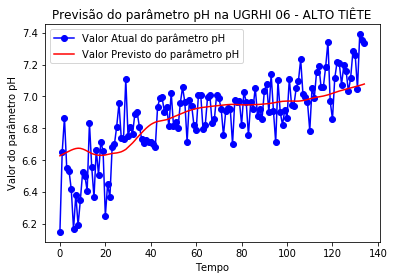

In [16]:
print("Rede Neural LSTM com 81 neuronios nas camadas de entrada e oculta - epocas:100")
model = Sequential() 

model.add(LSTM(units = 81, return_sequences = True, input_shape = (x_train.shape[1], 1))) 
model.add(Dropout(0.2))
model.add(LSTM(units = 81, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 81, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 81, return_sequences = False)) 
model.add(Dropout(0.2))
model.add(Dense(units = 1)) 
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 50, batch_size = 32)

y_pred = model.predict(x_test)
predicted_valor = sc.inverse_transform(y_pred)

plt.plot(y_test, color='blue', label='Valor Atual do parâmetro pH',marker='o')
plt.plot(predicted_valor, color='red', label='Valor Previsto do parâmetro pH')
plt.title('Previsão do parâmetro pH na UGRHI 06 - ALTO TIÊTE')
plt.xlabel('Tempo')
plt.ylabel('Valor do parâmetro pH')
plt.legend()
plt.show()

mse = np.square(np.subtract(y_test,predicted_valor)).mean()
#print("MSE:", round(mse,2))
    
resultado_mse.append(mse)
qtde_neuronios.append(81)

Rede Neural LSTM com 120 neuronios nas camadas de entrada e oculta - epocas:100
Train on 133 samples
Epoch 1/50
133/133 [==============================] - 21s 155ms/sample - loss: 0.2037 - accuracy: 0.0000e+00
Epoch 2/50
133/133 [==============================] - 2s 13ms/sample - loss: 0.0714 - accuracy: 0.0000e+00
Epoch 3/50
133/133 [==============================] - 2s 13ms/sample - loss: 0.0436 - accuracy: 0.0000e+00
Epoch 4/50
133/133 [==============================] - 2s 13ms/sample - loss: 0.0384 - accuracy: 0.0075
Epoch 5/50
133/133 [==============================] - 2s 12ms/sample - loss: 0.0317 - accuracy: 0.0075
Epoch 6/50
133/133 [==============================] - 2s 13ms/sample - loss: 0.0234 - accuracy: 0.0075
Epoch 7/50
133/133 [==============================] - 2s 12ms/sample - loss: 0.0325 - accuracy: 0.0075
Epoch 8/50
133/133 [==============================] - 2s 12ms/sample - loss: 0.0272 - accuracy: 0.0075
Epoch 9/50
133/133 [==============================] - 2s 12ms

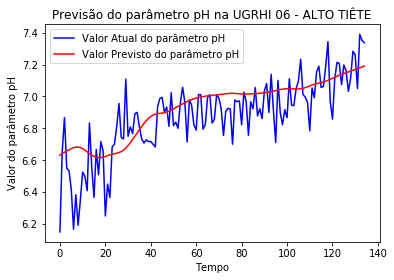

In [17]:
print("Rede Neural LSTM com 120 neuronios nas camadas de entrada e oculta - epocas:100")
model = Sequential() 

model.add(LSTM(units = 120, return_sequences = True, input_shape = (x_train.shape[1], 1))) 
model.add(Dropout(0.2))
model.add(LSTM(units = 120, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 120, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 120, return_sequences = False)) 
model.add(Dropout(0.2))
model.add(Dense(units = 1)) 
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 50, batch_size = 32)

y_pred = model.predict(x_test)
predicted_valor = sc.inverse_transform(y_pred)

plt.plot(y_test, color='blue', label='Valor Atual do parâmetro pH',marker='o')
plt.plot(predicted_valor, color='red', label='Valor Previsto do parâmetro pH')
plt.title('Previsão do parâmetro pH na UGRHI 06 - ALTO TIÊTE')
plt.xlabel('Tempo')
plt.ylabel('Valor do parâmetro pH')
plt.legend()
plt.show()

mse = np.square(np.subtract(y_test,predicted_valor)).mean()
#print("MSE:", round(mse,2))
    
resultado_mse.append(mse)
qtde_neuronios.append(120)

Rede Neural LSTM com 163 neuronios nas camadas de entrada e oculta - epocas:100
Train on 133 samples
Epoch 1/50
133/133 [==============================] - 22s 169ms/sample - loss: 0.1741 - accuracy: 0.0075
Epoch 2/50
133/133 [==============================] - 2s 16ms/sample - loss: 0.0991 - accuracy: 0.0000e+00
Epoch 3/50
133/133 [==============================] - 2s 16ms/sample - loss: 0.0381 - accuracy: 0.0075
Epoch 4/50
133/133 [==============================] - 2s 16ms/sample - loss: 0.0337 - accuracy: 0.0075
Epoch 5/50
133/133 [==============================] - 2s 17ms/sample - loss: 0.0297 - accuracy: 0.0075
Epoch 6/50
133/133 [==============================] - 2s 18ms/sample - loss: 0.0267 - accuracy: 0.0075
Epoch 7/50
133/133 [==============================] - 2s 16ms/sample - loss: 0.0283 - accuracy: 0.0075
Epoch 8/50
133/133 [==============================] - 2s 16ms/sample - loss: 0.0253 - accuracy: 0.0075
Epoch 9/50
133/133 [==============================] - 2s 16ms/sample 

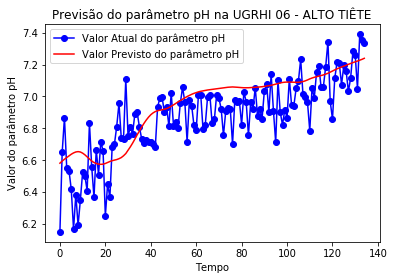

NameError: name 'resultado_mse' is not defined

In [21]:
print("Rede Neural LSTM com 163 neuronios nas camadas de entrada e oculta - epocas:100")
model = Sequential() 

model.add(LSTM(units = 163, return_sequences = True, input_shape = (x_train.shape[1], 1))) 
model.add(Dropout(0.2))
model.add(LSTM(units = 163, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 163, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 163, return_sequences = False)) 
model.add(Dropout(0.2))
model.add(Dense(units = 1)) 
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 50, batch_size = 32)

y_pred = model.predict(x_test)
predicted_valor = sc.inverse_transform(y_pred)

plt.plot(y_test, color='blue', label='Valor Atual do parâmetro pH',marker='o')
plt.plot(predicted_valor, color='red', label='Valor Previsto do parâmetro pH')
plt.title('Previsão do parâmetro pH na UGRHI 06 - ALTO TIÊTE')
plt.xlabel('Tempo')
plt.ylabel('Valor do parâmetro pH')
plt.legend()
plt.show()

mse = np.square(np.subtract(y_test,predicted_valor)).mean()
#print("MSE:", round(mse,2))
    
resultado_mse.append(mse)
qtde_neuronios.append(163)


In [22]:
real_p = []
previsto_p = []
mse_p = []

for i in range(len(y_test)):
    real_p.append(round(y_test[i][0],2))
    #print("Real:",round(y_test[i][0],2))

for i in range(len(predicted_valor)):
    previsto_p.append(round(predicted_valor[i][0],2))
    #print("Previsto",round(predicted_valor[i][0],2))
    
for i in range(len(predicted_valor)):
    mse = np.square(np.subtract(y_test[i][0],predicted_valor[i][0])).mean()
    mse_p.append(mse)

In [17]:
resultado_mse_ph = [0.029216,0.023934,0.023685]
resultado_mse_od=[1.953787,1.931592,1.204403]
qtde_neuronios = [10,25,50]

d = {'N_neuronios':qtde_neuronios,
     'MSE_PH':resultado_mse_ph,
     'MSE_OD':resultado_mse_od}

tabela = pd.DataFrame(d)
tabela = tabela.sort_values(by=['N_neuronios'])
tabela

,N_neuronios,MSE,MSE2
0,10,0.029216,1.953787
1,25,0.023934,1.931592
2,50,0.023685,1.204403


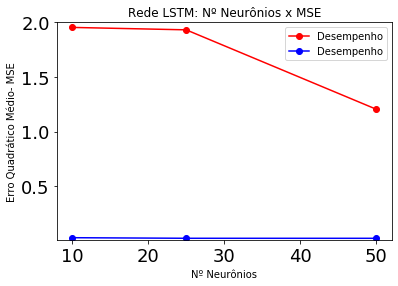

In [25]:
plt.plot(tabela.N_neuronios.values,tabela.MSE2.values, color='red', label='Desempenho',marker='o')
plt.plot(tabela.N_neuronios.values,tabela.MSE.values, color='blue', label='Desempenho',marker='o')
plt.ylim(0.01,2)
plt.title('Rede LSTM: Nº Neurônios x MSE')
plt.xlabel('Nº Neurônios')
plt.ylabel('Erro Quadrático Médio- MSE')
plt.legend()
plt.show()

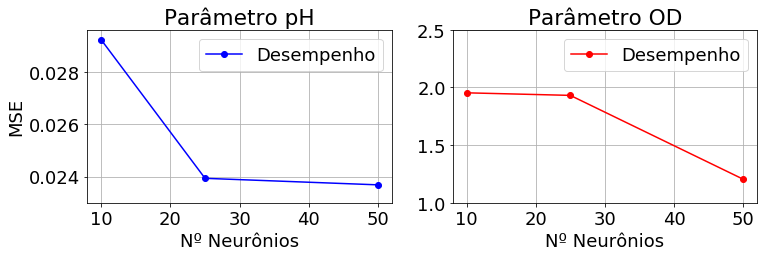

In [79]:
fig = plt.figure(figsize=(12,7))
plt.subplot(221)
plt.title('Parâmetro pH')
plt.plot(tabela.N_neuronios.values,tabela.MSE.values, color='blue', label='Desempenho',marker='o')
plt.xlabel('Nº Neurônios')
plt.ylabel('MSE')
plt.ylim(0.023,0.0296)
plt.legend()
plt.grid()

plt.subplot(222)
plt.title('Parâmetro OD')
plt.plot(tabela.N_neuronios.values,tabela.MSE2.values, color='red', label='Desempenho',marker='o')
plt.xlabel('Nº Neurônios')
#plt.ylabel('MSE')
plt.ylim(1,2.5)
plt.legend()
plt.grid()
plt.show()

In [57]:
test_set.resample('3M').mean()

,cod_interaguas,valor,Altitude
data_coleta,,,
1978-01-31,121.400000,6.680000,713.000000
1978-04-30,121.400000,6.566667,713.000000
1978-07-31,121.400000,6.553333,713.000000
1978-10-31,121.400000,6.193333,713.000000
1979-01-31,122.214286,6.221429,710.357143
...,...,...,...
2018-10-31,802.461538,7.260769,724.923077
2019-01-31,868.370370,7.049259,725.962963
2019-04-30,1781.000000,7.390000,720.200000


In [39]:
    
data = {'real50':real_m,
        'previsto50':previsto_m,
        'mse50':mse_m}

tabela = pd.DataFrame(data)
tabela.head(10)

r = tabela['real50'].mean()
p = tabela['previsto50'].mean()

dif_media = round(p-r,2)
dif_media

0.01